# Testes de Hipótese em Python

Material baseado no curso [Hypothesis Testing in Python](https://www.datacamp.com/courses/hypothesis-testing-in-python) do Datacamp.

Autoria: Mariana Emerenciano.

## 1. Introdução aos Testes de Hipótese

* Hipótese nula (H₀): Representa o status quo, ou seja, a ideia inicial que queremos testar.

* Hipótese alternativa (Hₐ): A nova ideia que queremos provar.

* Significância estatística: Medida de quão improvável seria obter os dados observados se H₀ fosse verdadeira.

* Nível de significância (α): O limiar para rejeição de H₀ (exemplo: 0.05).

* p-valor: A probabilidade de obtermos um resultado tão extremo quanto o observado, assumindo que H₀ seja verdadeira.


[Artigo introdutório](https://www.datacamp.com/tutorial/hypothesis-testing)

### 1.1. Bootstrap e Estimativa de Média
O bootstrap é um método de reamostragem que ajuda a estimar a distribuição de um estatística.

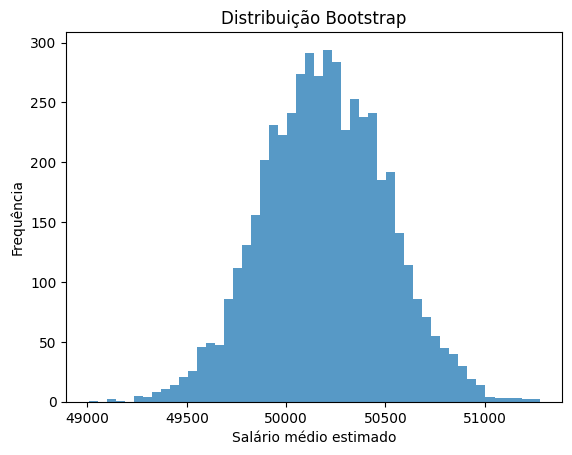

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criando um dataset experimental
np.random.seed(42)
data = pd.DataFrame({'salario': np.random.normal(loc=50000, scale=10000, size=1000)})

# Bootstrap
bootstrap_means = []
for _ in range(5000):
    sample = data.sample(frac=1, replace=True)
    bootstrap_means.append(sample['salario'].mean())

# Visualizando a distribuição bootstrap
plt.hist(bootstrap_means, bins=50, alpha=0.75)
plt.xlabel("Salário médio estimado")
plt.ylabel("Frequência")
plt.title("Distribuição Bootstrap")
plt.show()


## 2. Testes Paramétricos

[T-test vs. Z-test](https://www.datacamp.com/tutorial/t-test-vs-z-test?utm_adgroupid=157296750457&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_targetid=aud-2191467490070:dsa-2264919291789&utm_loc_interest_ms=&utm_loc_physical_ms=9101483&utm_content=&gad_source=1)

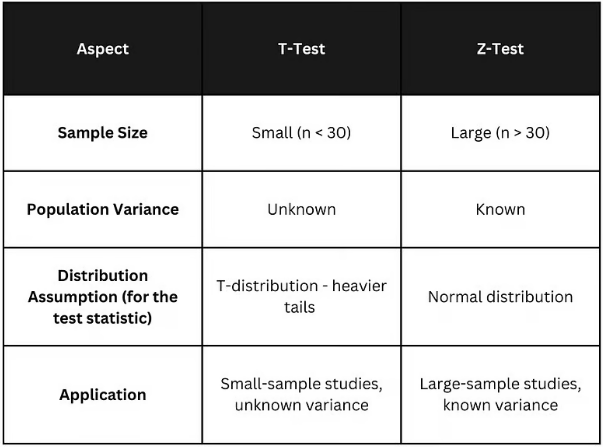

##### Principais diferenças entre t-test e z-test. Imagem de Arunn Thevapalan

### 2.1 Teste z

* Usado quando a amostra é grande (n > 30) e a variância populacional é conhecida.

* Aplicado para proporções e médias.

* Exemplo: Verificar se a proporção de usuários abaixo de 30 anos no Stack Overflow é diferente de 50%.


#### 2.1.1 Teste z para Proporções
Testa se a proporção de um grupo é significativamente diferente de um valor hipotético.

In [3]:
from statsmodels.stats.proportion import proportions_ztest

# Suponha que temos 200 pessoas e 120 são a favor de uma mudança
sucessos = 120
n = 200
p_0 = 0.5  # Proporção hipotética

# Teste z
z_stat, p_value = proportions_ztest(sucessos, n, value=p_0, alternative='two-sided')

print(f"Estatística z: {z_stat:.4f}, p-valor: {p_value:.4f}")


Estatística z: 2.8868, p-valor: 0.0039


### 2.2 Teste t

* Utilizado quando a variância populacional é desconhecida e o tamanho da amostra é pequeno (n < 30). Pode ser:
    * Teste t para uma amostra: Compara a média de uma amostra com um valor fixo.
    * Teste t para duas amostras independentes: Compara médias de dois grupos distintos.
    * Teste t pareado: Compara médias antes e depois de uma intervenção.

#### 2.2.1 Teste t para Comparação de Médias
Testa se duas médias são significativamente diferentes.

In [5]:
from scipy.stats import ttest_ind

# Criando dois grupos experimentais
grupo_A = np.random.normal(loc=52000, scale=10000, size=100)
grupo_B = np.random.normal(loc=50000, scale=10000, size=100)

# Teste t para amostras independentes
t_stat, p_value = ttest_ind(grupo_A, grupo_B, equal_var=False)
print(f"Estatística t: {t_stat:.4f}, p-valor: {p_value:.4f}")

Estatística t: 1.1975, p-valor: 0.2326


## 3. Teste Qui-Quadrado

* Objetivo: Avaliar independência entre variáveis categóricas.

* Tipos:
    * Qui-quadrado de independência: Testa se duas variáveis estão associadas (exemplo: hobby e idade no Stack Overflow).
    * Qui-quadrado de aderência (goodness of fit): Testa se os dados seguem uma distribuição esperada.

### 3.1 Teste Qui-Quadrado para Independência
Verifica se duas variáveis categóricas são independentes.

In [6]:
import scipy.stats as stats

# Criando um dataset fictício
dados = pd.DataFrame({
    'Gênero': np.random.choice(['Masculino', 'Feminino'], size=200),
    'Compra': np.random.choice(['Sim', 'Não'], size=200)
})

# Criando uma tabela de contingência
contingencia = pd.crosstab(dados['Gênero'], dados['Compra'])

# Teste qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(contingencia)
print(f"Estatística Qui-quadrado: {chi2:.4f}, p-valor: {p:.4f}")


Estatística Qui-quadrado: 0.0555, p-valor: 0.8137


## 4. Análise de Variância (ANOVA)

* Objetivo: Comparar médias entre três ou mais grupos.

* Hipóteses:
    * H₀: Todas as médias são iguais.
    * Hₐ: Pelo menos uma média é diferente.

* ANOVA unidirecional: Um único fator categórico (exemplo: salário e satisfação no trabalho).

* ANOVA de dois fatores: Avalia o impacto de duas variáveis categóricas.


[Artigo sobre ANOVA](https://www.datacamp.com/tutorial/anova-test)

### 4.1 ANOVA para Comparação de Múltiplos Grupos
Analisa se três ou mais grupos possuem médias diferentes.

In [7]:
from scipy.stats import f_oneway

# Criando três grupos experimentais
grupo1 = np.random.normal(50000, 10000, 50)
grupo2 = np.random.normal(52000, 10000, 50)
grupo3 = np.random.normal(53000, 10000, 50)

# Teste ANOVA
f_stat, p_value = f_oneway(grupo1, grupo2, grupo3)
print(f"Estatística F: {f_stat:.4f}, p-valor: {p_value:.4f}")


Estatística F: 5.2437, p-valor: 0.0063


## 5. Testes Não Paramétricos
Quando os dados não seguem uma distribuição normal, utilizamos testes baseados em rankings:

* Teste de Wilcoxon Signed-Rank: Alternativa não paramétrica ao teste t pareado.
* Teste de Mann-Whitney U (Wilcoxon Rank-Sum): Alternativa ao teste t para duas amostras independentes.
* Teste de Kruskal-Wallis: Alternativa à ANOVA para múltiplos grupos.

### 5.1 Teste de Wilcoxon (Para Pares)
Compara duas amostras dependentes.

In [8]:
from scipy.stats import wilcoxon

# Criando um dataset com medições antes e depois de um tratamento
antes = np.random.normal(50000, 10000, 30)
depois = antes + np.random.normal(1000, 5000, 30)  # Pequena melhoria

# Teste de Wilcoxon
stat, p = wilcoxon(antes, depois)
print(f"Estatística W: {stat:.4f}, p-valor: {p:.4f}")


Estatística W: 231.0000, p-valor: 0.9838


### 5.2 Teste de Mann-Whitney U (Wilcoxon Rank-Sum)
O teste de Mann-Whitney U é usado para comparar duas amostras independentes quando a suposição de normalidade não pode ser garantida.

In [9]:
import numpy as np
import scipy.stats as stats

# Gerando dois grupos de dados não normalmente distribuídos
np.random.seed(42)
grupo_A = np.random.exponential(scale=50000, size=50)
grupo_B = np.random.exponential(scale=52000, size=50)

# Teste de Mann-Whitney U
stat, p_value = stats.mannwhitneyu(grupo_A, grupo_B, alternative='two-sided')

print(f"Estatística U: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: as distribuições são significativamente diferentes.")
else:
    print("Falhamos em rejeitar H0: não há evidências de diferença significativa.")


Estatística U: 1114.0000
p-valor: 0.3502
Falhamos em rejeitar H0: não há evidências de diferença significativa.


### 5.3 Teste de Kruskal-Wallis
O teste de Kruskal-Wallis é uma alternativa não paramétrica à ANOVA, usada para comparar três ou mais grupos.

In [10]:
# Criando três grupos não normalmente distribuídos
grupo_1 = np.random.exponential(scale=50000, size=40)
grupo_2 = np.random.exponential(scale=52000, size=40)
grupo_3 = np.random.exponential(scale=54000, size=40)

# Teste de Kruskal-Wallis
stat, p_value = stats.kruskal(grupo_1, grupo_2, grupo_3)

print(f"Estatística H: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretando o resultado
if p_value < alpha:
    print("Rejeitamos H0: pelo menos um grupo tem uma distribuição diferente.")
else:
    print("Falhamos em rejeitar H0: não há evidências de diferença significativa entre os grupos.")


Estatística H: 1.5731
p-valor: 0.4554
Falhamos em rejeitar H0: não há evidências de diferença significativa entre os grupos.


## 6. Erros em Testes de Hipótese

### 6.1  Erro Tipo I (Falso Positivo)
O erro tipo I ocorre quando rejeitamos a hipótese nula H₀ quando ela é verdadeira. Isso significa que encontramos um efeito que, na realidade, não existe.

In [11]:
import numpy as np
from scipy.stats import norm

# Definição do nível de significância (α)
alpha = 0.05  # 5% de chance de cometer erro tipo I

# Suponha que H₀ seja verdadeira (exemplo: o efeito de um novo remédio é igual ao placebo)
# Gerando 100 testes aleatórios com H₀ verdadeira
np.random.seed(42)
p_values = np.random.uniform(0, 1, 100)

# Contando quantos testes rejeitaram H₀ erroneamente (p < α)
erro_tipo_I = sum(p_values < alpha)

print(f"Número de falsos positivos (Erro Tipo I): {erro_tipo_I} de 100 testes")


Número de falsos positivos (Erro Tipo I): 6 de 100 testes


### 6.2 Erro Tipo II (Falso Negativo)
O erro tipo II ocorre quando falhamos em rejeitar H₀ quando ela é falsa. Isso significa que deixamos de detectar um efeito real.

In [12]:
from scipy.stats import ttest_ind

# Criando duas amostras onde há uma diferença real entre os grupos
np.random.seed(42)
grupo_A = np.random.normal(loc=50000, scale=10000, size=30)
grupo_B = np.random.normal(loc=52000, scale=10000, size=30)  # Média maior

# Teste t para verificar diferença
t_stat, p_value = ttest_ind(grupo_A, grupo_B)

# Definindo um nível de significância muito rigoroso (α muito baixo)
alpha = 0.001  # 0.1% de chance de erro tipo I

if p_value < alpha:
    print("Rejeitamos H₀: diferença significativa detectada")
else:
    print("Falha em rejeitar H₀: erro tipo II pode ter ocorrido")

print(f"p-valor do teste: {p_value:.5f}")


Falha em rejeitar H₀: erro tipo II pode ter ocorrido
p-valor do teste: 0.26345


### 6.3 Compromisso entre Erros Tipo I e Tipo II
Ajustar o α afeta a probabilidade dos erros tipo I e II.

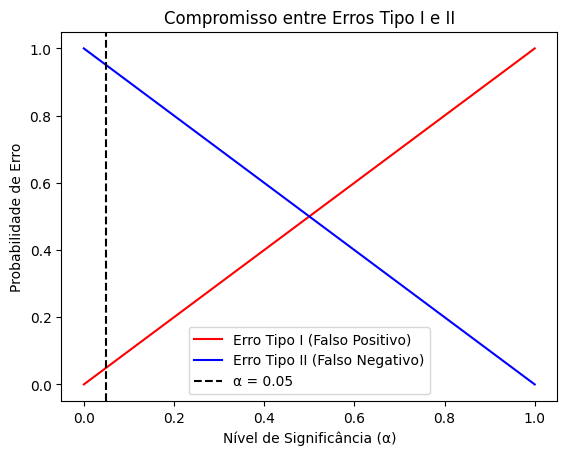

In [13]:
import matplotlib.pyplot as plt

# Criando valores de α variando entre 0 e 1
alpha_values = np.linspace(0, 1, 100)
erro_tipo_I = alpha_values  # Quanto maior α, maior o erro tipo I
erro_tipo_II = 1 - alpha_values  # Quanto menor α, maior o erro tipo II

plt.plot(alpha_values, erro_tipo_I, label="Erro Tipo I (Falso Positivo)", color="red")
plt.plot(alpha_values, erro_tipo_II, label="Erro Tipo II (Falso Negativo)", color="blue")
plt.axvline(0.05, linestyle="--", color="black", label="α = 0.05")
plt.xlabel("Nível de Significância (α)")
plt.ylabel("Probabilidade de Erro")
plt.title("Compromisso entre Erros Tipo I e II")
plt.legend()
plt.show()


## 7. Suposições dos Testes Estatísticos

Para um teste de hipótese ser válido, algumas suposições precisam ser verificadas:

* Aleatoriedade: A amostra deve ser representativa da população.
* Independência: As observações não devem estar correlacionadas.
* Tamanho da amostra: Alguns testes requerem um número mínimo de observações.
* Distribuição Normal: Testes paramétricos assumem que os dados seguem uma distribuição normal.

## 8. Testes em A/B Testing

* Objetivo: Comparar o impacto de diferentes variações de um experimento (exemplo: duas campanhas publicitárias).
* Processo:
    * Separação dos grupos (controle e tratamento).
    * Aplicação de um teste estatístico (z-test, t-test, etc.).
    * Avaliação da significância dos resultados.

[O que é A/B Testing?](https://www.datacamp.com/blog/data-demystified-what-is-a-b-testing)

### 8.1 Passo 1: Gerar Dados para Controle e Tratamento

In [14]:
# Simulando conversões de usuários para dois grupos
np.random.seed(42)
n_controle = 1000
n_tratamento = 1000

# Taxas de conversão (grupo tratamento tem um aumento)
conversoes_controle = np.random.binomial(1, 0.10, n_controle)  # 10% de conversão
conversoes_tratamento = np.random.binomial(1, 0.12, n_tratamento)  # 12% de conversão

# Calculando médias
taxa_controle = conversoes_controle.mean()
taxa_tratamento = conversoes_tratamento.mean()

print(f"Taxa de conversão do grupo controle: {taxa_controle:.2%}")
print(f"Taxa de conversão do grupo tratamento: {taxa_tratamento:.2%}")


Taxa de conversão do grupo controle: 10.00%
Taxa de conversão do grupo tratamento: 11.20%


### 8.2 Passo 2: Aplicar Teste Estatístico
Usamos um teste z para proporções, pois estamos comparando duas proporções.

In [15]:
from statsmodels.stats.proportion import proportions_ztest

# Número de conversões em cada grupo
sucessos = [sum(conversoes_controle), sum(conversoes_tratamento)]
n_total = [n_controle, n_tratamento]

# Teste z para A/B testing
z_stat, p_value = proportions_ztest(sucessos, n_total)

print(f"Estatística z: {z_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H₀: O grupo tratamento tem um impacto significativo.")
else:
    print("Falhamos em rejeitar H₀: Não há evidências de impacto significativo.")


Estatística z: -0.8717
p-valor: 0.3834
Falhamos em rejeitar H₀: Não há evidências de impacto significativo.


### 8.3 Passo 3: Visualizar Resultados

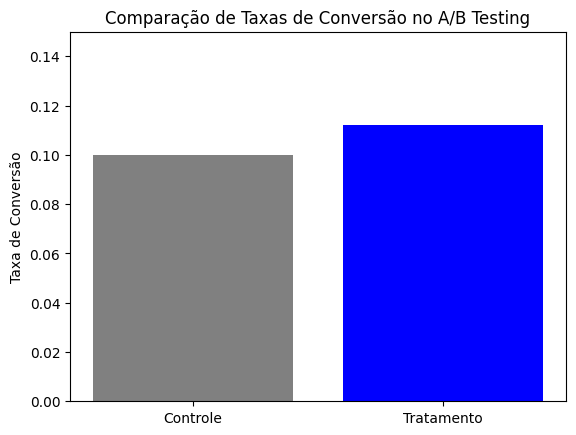

In [16]:
# Criando gráfico de barras para visualizar taxas de conversão
plt.bar(["Controle", "Tratamento"], [taxa_controle, taxa_tratamento], color=["gray", "blue"])
plt.ylabel("Taxa de Conversão")
plt.title("Comparação de Taxas de Conversão no A/B Testing")
plt.ylim(0, 0.15)  # Ajustando os limites do gráfico
plt.show()


# Conclusão
O curso cobriu conceitos fundamentais de testes de hipótese, explorando diferentes testes estatísticos e suas aplicações. Também abordou a importância das suposições e os erros associados à inferência estatística.

# Revisão de conceitos

1. O que é um teste de hipótese?

2. O que representa o p-valor em um teste de hipótese?

3. Qual é a diferença entre um erro Tipo I e um erro Tipo II?

4. O que significa definir um nível de significância (α)?

5. Quando devemos usar um teste t em vez de um teste z?

6. Quais são os tipos de testes t e quando usá-los?

7. Para que serve um teste de proporções (z-test)?

8. Quando devemos usar um teste de Mann-Whitney U em vez de um teste t?

9. O que é o teste de Kruskal-Wallis e quando utilizá-lo?

10. Qual a principal vantagem dos testes não paramétricos?

11. Qual é o objetivo do teste qui-quadrado de independência?

12. Quando devemos usar um teste qui-quadrado de aderência (goodness of fit)?

13. O que a ANOVA testa e quais são suas hipóteses?

14. Se a ANOVA indicar uma diferença significativa, qual teste adicional deve ser usado?

15. Qual é o objetivo de um teste A/B? Como ele é conduzido?

16. O que significa um p-valor alto em um teste A/B?

17.  Por que é importante definir um tamanho de amostra adequado antes de conduzir um teste A/B?

18. O que significa quando um teste estatístico "falha em rejeitar H₀"?
